In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

In [3]:
y_train_valid -= 769
y_test -= 769

In [4]:
# split into train and validation set
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [5]:
from keras import layers, models, regularizers

Using TensorFlow backend.


In [10]:
inputs = layers.Input(shape=(22, 1000))
d1 = layers.Dense(20, activation='relu')(inputs)
d2 = layers.Dense(10, activation='relu')(inputs)
d3 = layers.Dense(10, activation='relu')(d2)
cat1 = layers.Concatenate()([d1, d3])
f1 = layers.Flatten()(cat1)
outputs = layers.Dense(4, activation='softmax')(f1)

In [11]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 22, 1000)     0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 22, 10)       10010       input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 22, 20)       20020       input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 22, 10)       110         dense_6[0][0]                    
____________________________________________________________________________________________

In [13]:
model.fit(Xtrain, ytrain)


Epoch 1/1
1692/1692 [==============================] - 2s 945us/step - loss: 6.1556 - acc: 0.2754


In [14]:
model.get_layer('dense_5').get_weights()

[array([[ 0.00900807,  0.06454665, -0.07458496, ..., -0.07253902,
          0.01597231,  0.028544  ],
        [ 0.02697947,  0.03845553, -0.04848167, ..., -0.04690543,
         -0.01148348, -0.00677519],
        [-0.05737805, -0.06755111,  0.06540516, ...,  0.06341277,
         -0.0301468 ,  0.00864893],
        ...,
        [-0.0234506 ,  0.02636459,  0.04195694, ..., -0.05426766,
          0.05349506, -0.06912536],
        [-0.0054169 ,  0.05204823, -0.00611601, ..., -0.05427005,
         -0.00791496, -0.06055442],
        [ 0.05409981,  0.0488034 , -0.02444971, ..., -0.02650516,
         -0.01488343,  0.03787948]], dtype=float32),
 array([-0.01900063, -0.00995925, -0.02170123, -0.01564665, -0.02369984,
        -0.01083611, -0.03014391, -0.00327498, -0.01909629, -0.02216669,
        -0.02496535, -0.02068056, -0.02791447, -0.01833859, -0.02070518,
        -0.01633801, -0.01518501, -0.01452962, -0.01071978, -0.02458386],
       dtype=float32)]

In [15]:
reg1 = regularizers.l2(0.01)
reg2 = regularizers.l1(0.001)

In [16]:
inputs = layers.Input(shape=(22, 1000))
d1 = layers.Dense(20, activation='relu', kernel_regularizer=reg1)(inputs)
d2 = layers.Dense(10, activation='relu')(inputs)
d3 = layers.Dense(10, activation='relu', activity_regularizer=reg2)(d2)
cat1 = layers.Concatenate()([d1, d3])
f1 = layers.Flatten()(cat1)
outputs = layers.Dense(4, activation='softmax')(f1)

In [17]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [18]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 22, 1000)     0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 22, 10)       10010       input_3[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 22, 20)       20020       input_3[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 22, 10)       110         dense_10[0][0]                   
____________________________________________________________________________________________

In [21]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((22, 1000, 1))(inputs)
c1 = layers.Conv2D(10, (22, 10), strides=(1, 10))(r1)

In [22]:
c1

<tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 1, 100, 10) dtype=float32>

In [23]:
r2 = layers.Reshape((100, 10))(c1)
gru1 = layers.GRU(10)(r2)
outputs = layers.Dense(4, activation='softmax')(gru1)

In [24]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [25]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 22, 1000, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 100, 10)        2210      
_________________________________________________________________
reshape_3 (Reshape)          (None, 100, 10)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                630       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 44        
Total params: 2,884
Trainable params: 2,884
Non-trainable params: 0
_________________________________________________________

In [26]:
model.fit(Xtrain, ytrain)

Epoch 1/1
1692/1692 [==============================] - 5s 3ms/step - loss: 1.5106 - acc: 0.2524


In [33]:
inputs = layers.Input(shape = (22, 1000))
f1 = layers.Flatten()(inputs)
z = layers.Dense(2)(f1)
d1 = layers.Dense(22*1000)(z)
outputs = layers.Reshape((22, 1000))(d1)

In [34]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'mse')

In [35]:
model.fit(Xtrain, Xtrain, epochs = 5)

Epoch 1/5
1692/1692 [==============================] - 3s 2ms/step - loss: 112.7914
Epoch 2/5
1692/1692 [==============================] - 3s 1ms/step - loss: 109.7049
Epoch 3/5
1692/1692 [==============================] - 2s 1ms/step - loss: 109.5402
Epoch 4/5
1692/1692 [==============================] - 2s 1ms/step - loss: 109.4911
Epoch 5/5
1692/1692 [==============================] - 2s 1ms/step - loss: 109.4505


In [36]:
encoder = models.Model(inputs=inputs, outputs=z)

In [38]:
zout = encoder.predict(Xtrain)
print(zout.shape)

(1692, 2)


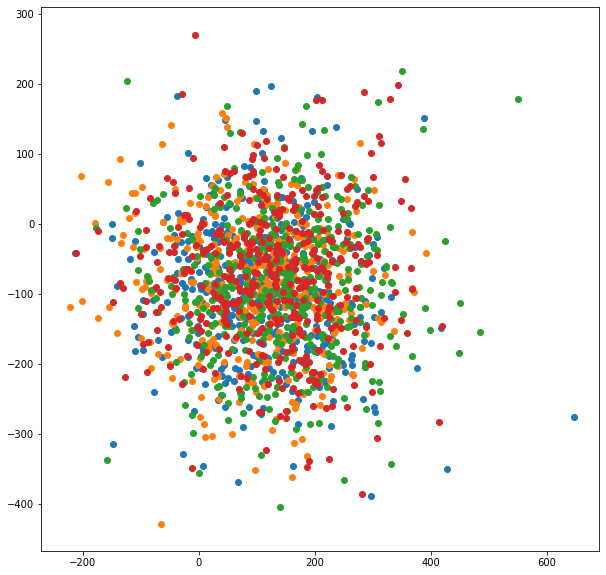

In [39]:
plt.figure(figsize=(10, 10))
for c in range(4):
    plt.scatter(zout[ytrain == c, 0], zout[ytrain == c, 1])